In [28]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [147]:
N = 100

In [148]:
grid = np.clip(np.random.randint(0,2,(N,N), dtype=np.int8) - np.random.randint(0,2,(N,N), dtype=np.int8), 0,1)

grid

array([[1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int8)

# MDP

In [149]:
start = (0,0)
goal = (9,9)

In [150]:
def set_reward(grid, start, goal, penalty = -10, rwd = 100, neutral = 1):
    reward = np.copy(grid)
    reward *= (penalty-neutral)
    reward += neutral
    reward[start] = 0
    reward[goal] = rwd
    return reward

In [151]:
def update_utility(reward, utility, gamma):
    action_set = np.asarray([(-1,0), (1,0),(0,-1),(0,1)])
    n_utility = np.zeros(reward.shape)
    for i in range(reward.shape[0]):
        for j in range(reward.shape[1]):
            
            cp = np.copy(action_set)
            cp += (i,j)
            cp = np.clip(cp, a_min=(0,0), a_max = (reward.shape[0]-1, reward.shape[1]-1))
            t = 0
            for k in cp:
                n = sum([1 if k[0]==i[0] and k[1]==i[1] else 0 for i in cp])
                t = max(t, n/4 * utility[k[0],k[1]])
                
            n_utility[i,j] += reward[i,j] + gamma * t
    return n_utility

In [152]:
def get_path(grid, start, end, utility):
    action_set = np.asarray([(-1,0), (1,0),(0,-1),(0,1)])
    path = np.copy(grid)
    point = start
    x = 0
    while(point[0]!= end[0] and point[1]!=end[1]):
        path[point[0],point[1]] = 3
        cp = np.copy(action_set)
        cp += point
        cp = np.clip(cp, a_min=(0,0), a_max = (grid.shape[0]-1, grid.shape[1]-1))
        t = [utility[i[0],i[1]] for i in cp]
        f = np.where(t==max(t))[0]
        g = random.choice(f)
        point = cp[g]
        if x>100:
            break
        x+=1
    path[point]=3
    return path

In [153]:
def mdp(grid, start_node, goal_node,epochs, early_stop=0, gamma=0.5):
    reward = set_reward(grid, start_node, goal_node)
    utility = np.zeros(grid.shape)
    for _ in range(epochs):
        n_utility = update_utility(reward, utility, gamma)
        delta = np.max(n_utility-utility)
        utility = n_utility
        if delta <= early_stop:
            break
        
    g = get_path(grid, start_node, goal_node, utility)
    return utility, g

In [155]:
out = mdp(grid, start, goal, 100)

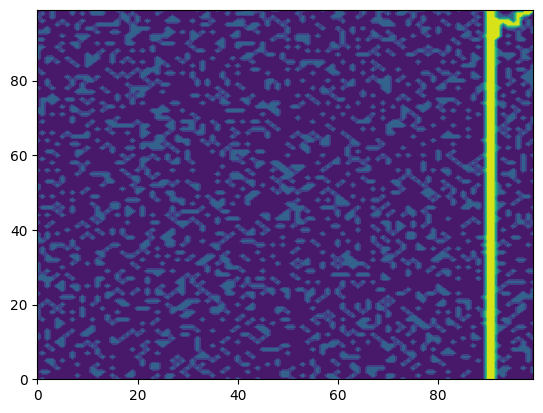

In [156]:
plt.contourf(out[1][::-1,::-1].T)